# German dataset

In [9]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# params
seed = 42

## 1. Подгрузка данных

[Ссылка на скачивание](http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval))

Второй по популярности, и еще меньший по объему датасет. Тоже многое уже подчищено.

Самое удивительное — мы не знаем, что за факторы используются в модели.

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat',
                 header = None, sep = ' ')

# based on the .doc data description
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'target']

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## 2. Анализ факторов

### Список факторов

Отсутствует:

> _All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data._

Очевидно, что мы имеем большое число категориальных переменных. В дальнейшем мы заменим их при помощи WOE-преобразования. На данный момент лишь сформируем разбивку train vs. test и запишем список переменных

In [4]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet('./samples/X_train.parquet')
X_test.to_parquet('./samples/X_test.parquet')
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet('./samples/y_train.parquet')
pd.DataFrame(y_test).to_parquet('./samples/y_test.parquet')

# сохраняем списки категориальных и колич. переменных
cat_vals = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
num_vals = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

with open('factors.json', 'w') as f:
    json.dump({'cat_vals': cat_vals, "num_vals": num_vals}, f)

Џ®¤Ї ЇЄ  Ё«Ё д ©« samples г¦Ґ бгйҐбвўгҐв.


## 3. Статистики и пропуски

### Статистики

In [5]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 690
Количество факторов: 14
Количество целевых событий: 307
Доля целевых событий: 44.49%


### Пропуски

Пропуски в датасете отсутствуют:

In [6]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {X[col].isna().sum() / df.shape[1] * 100}%')

Количество пропусков по фактору A1:
	0 или 0.0%
Количество пропусков по фактору A2:
	0 или 0.0%
Количество пропусков по фактору A3:
	0 или 0.0%
Количество пропусков по фактору A4:
	0 или 0.0%
Количество пропусков по фактору A5:
	0 или 0.0%
Количество пропусков по фактору A6:
	0 или 0.0%
Количество пропусков по фактору A7:
	0 или 0.0%
Количество пропусков по фактору A8:
	0 или 0.0%
Количество пропусков по фактору A9:
	0 или 0.0%
Количество пропусков по фактору A10:
	0 или 0.0%
Количество пропусков по фактору A11:
	0 или 0.0%
Количество пропусков по фактору A12:
	0 или 0.0%
Количество пропусков по фактору A13:
	0 или 0.0%
Количество пропусков по фактору A14:
	0 или 0.0%


## 4. Визуальный анализ и выбросы

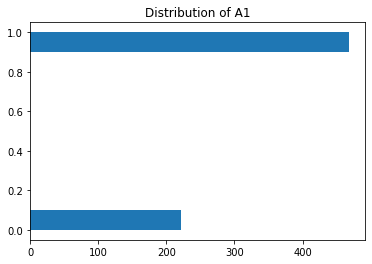

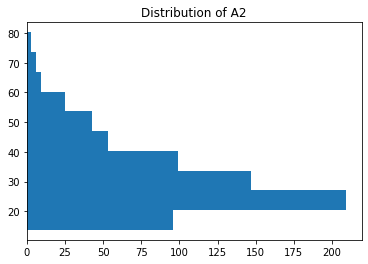

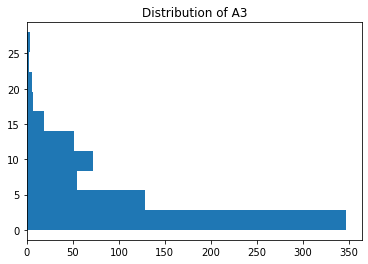

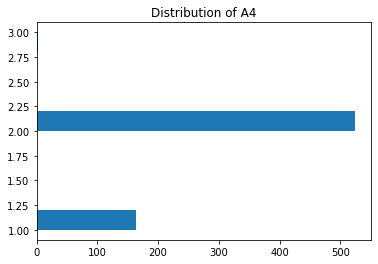

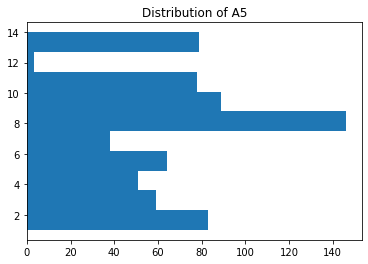

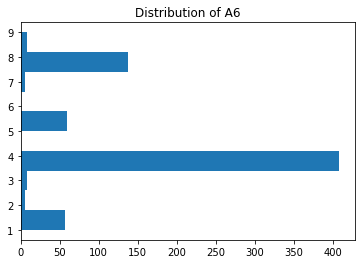

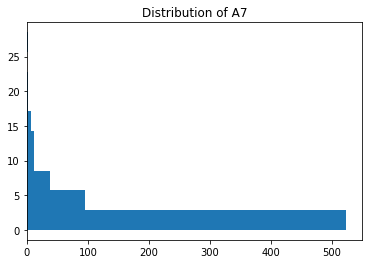

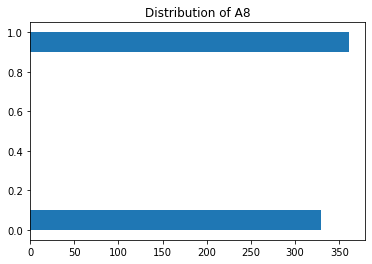

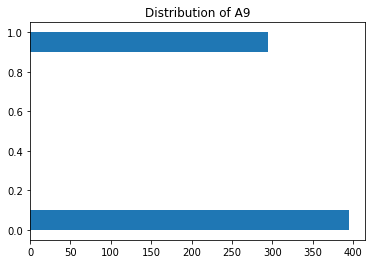

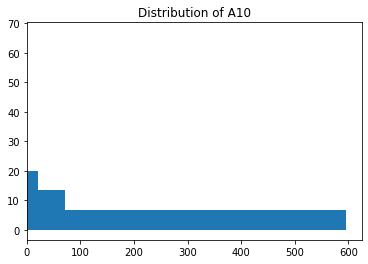

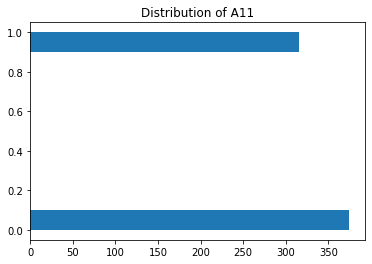

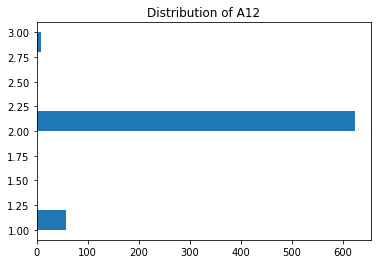

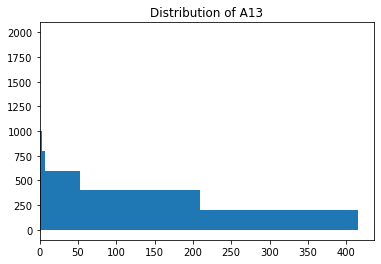

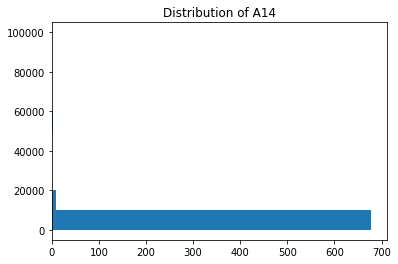

In [7]:
for col in X.columns:
    plt.hist(X[col], orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

In [11]:
describe = df.describe() #Basic describe
describe.loc['IQR'] = describe.loc['75%'] - describe.loc['25%'] #Adding IQR with the help of hint
describe = describe.append(df.reindex(describe.columns, axis=1).agg(['skew', 'mad', 'kurt'])) #Adding kurtosis, mad, and skew with the help of hint
describe

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.400000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.862940,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.000000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100001.000000,1.000000
IQR,1.000000,15.037500,6.207500,0.000000,6.000000,1.000000,2.460000,1.000000,1.000000,3.000000,1.000000,0.000000,192.000000,395.500000,1.000000
skew,-0.764859,1.155935,1.488813,-1.153455,-0.069190,0.468412,2.891330,-0.093056,0.293587,5.152520,0.169081,-1.944725,2.749912,13.140655,0.222122


### Анализ количественных переменных

Text(0.5, 0.98, 'Australian dataset')

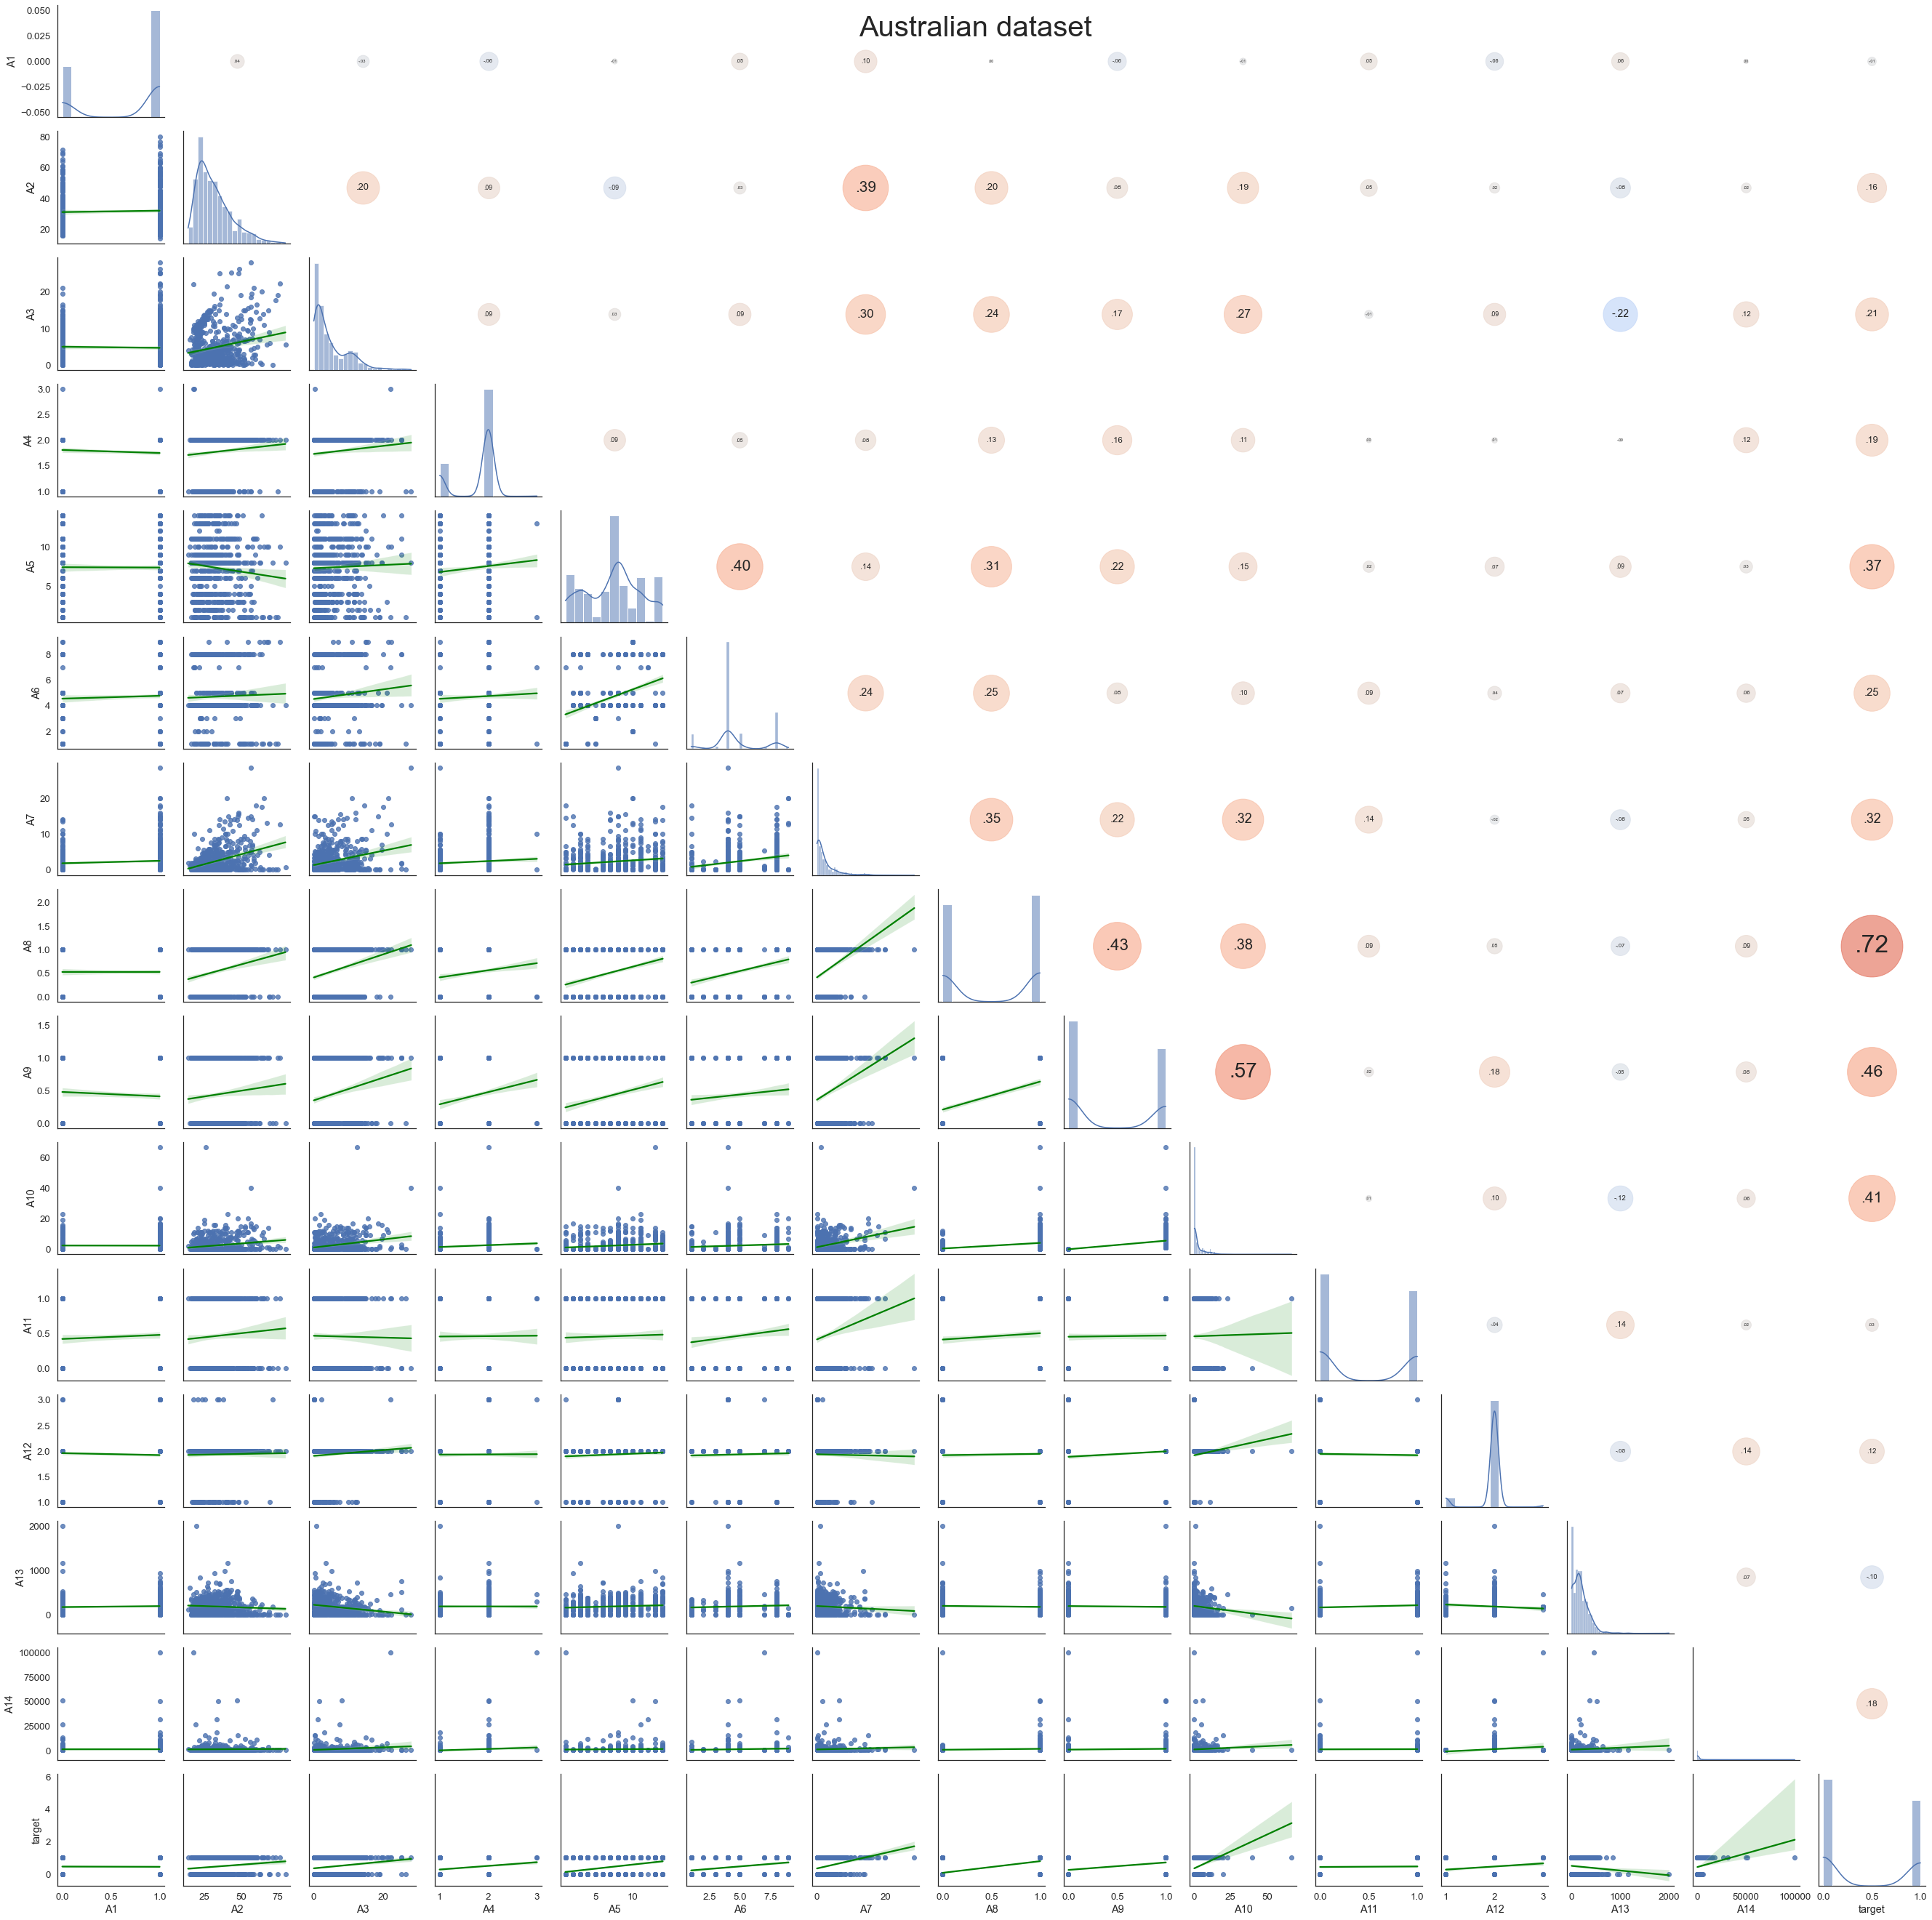

In [10]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000 #Size of circles depens on correlations
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes) #Color depend on corr
    font_size = abs(corr_r) * 40 + 5 #Font depend on correlation
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.2)
plot = sns.PairGrid(df, aspect=1, diag_sharey=False)
plot.map_lower(sns.regplot, line_kws={'color': 'green'})#Trends are linear and green with CI, so that to suspect nonlimearity
plot.map_diag(sns.histplot, kde=True)
plot.map_upper(corrdot)
plot.fig.suptitle("Australian dataset", size = 40) #Title

target сильно скореллирован с A8, A10 сильно непропорционален, у A14 выбросы

### Выводы 

Все довольно предсказуемо. Пропусков нет. Понимания факторов нет, из-за этого сложно судить о выбросах, но как будто есть некоторое число выбросов (например, см. распределение А13 и А14). Очень мало факторов, рекомендуется к использованию только для сравнимости с литературой.